# Exercise 2 The Lotka-Volterra System

![](./ex02.png)

The Lotka-Volterra system equations are:
$$ \frac{dx}{dt} = ax - bxy $$
$$ \frac{dy}{dt} = cxy - ey $$
To find the fixed points, we set $\frac{dx}{dt} = 0$ and $\frac{dy}{dt} = 0$ and solve for $x$ and $y$.

It has two fixed points:

1. $ (0, 0) $ 

This represents the extinction scenario where both prey and predator populations are zero.

2. $ \left(\frac{e}{c}, \frac{a}{b}\right) $ 

This represents a non-trivial equilibrium where both species coexist. The prey population stabilizes at $ \frac{e}{c} $ and the predator population stabilizes at $ \frac{a}{b} $.

To determine the stability, we need to compute the Jacobian matrix at each fixed point and analyze its eigenvalues.

1. At the fixed point $ (0, 0) $:
   - The Jacobian matrix is:
     $$
     \begin{bmatrix}
     a & 0 \\
     0 & -e
     \end{bmatrix}
     $$
   - The eigenvalues are $ a $ and $ -e $.
   - Since $ a > 0 $ and $ e > 0 $, one eigenvalue is positive and the other is negative, indicating a saddle point, which is unstable.

2. At the non-trivial fixed point $ \left(\frac{e}{c}, \frac{a}{b}\right) $:
   - The Jacobian matrix is:
     $$
     \begin{bmatrix}
     0 & -\frac{b e}{c} \\
     \frac{a c}{b} & 0
     \end{bmatrix}
     $$
   - The eigenvalues are $ \pm i \sqrt{ae} $, which are purely imaginary.
   - Purely imaginary eigenvalues suggest a center-like behavior, typically indicating neutrally stable cycles (neither converging nor diverging), characteristic of the Lotka-Volterra system's oscillatory dynamics.

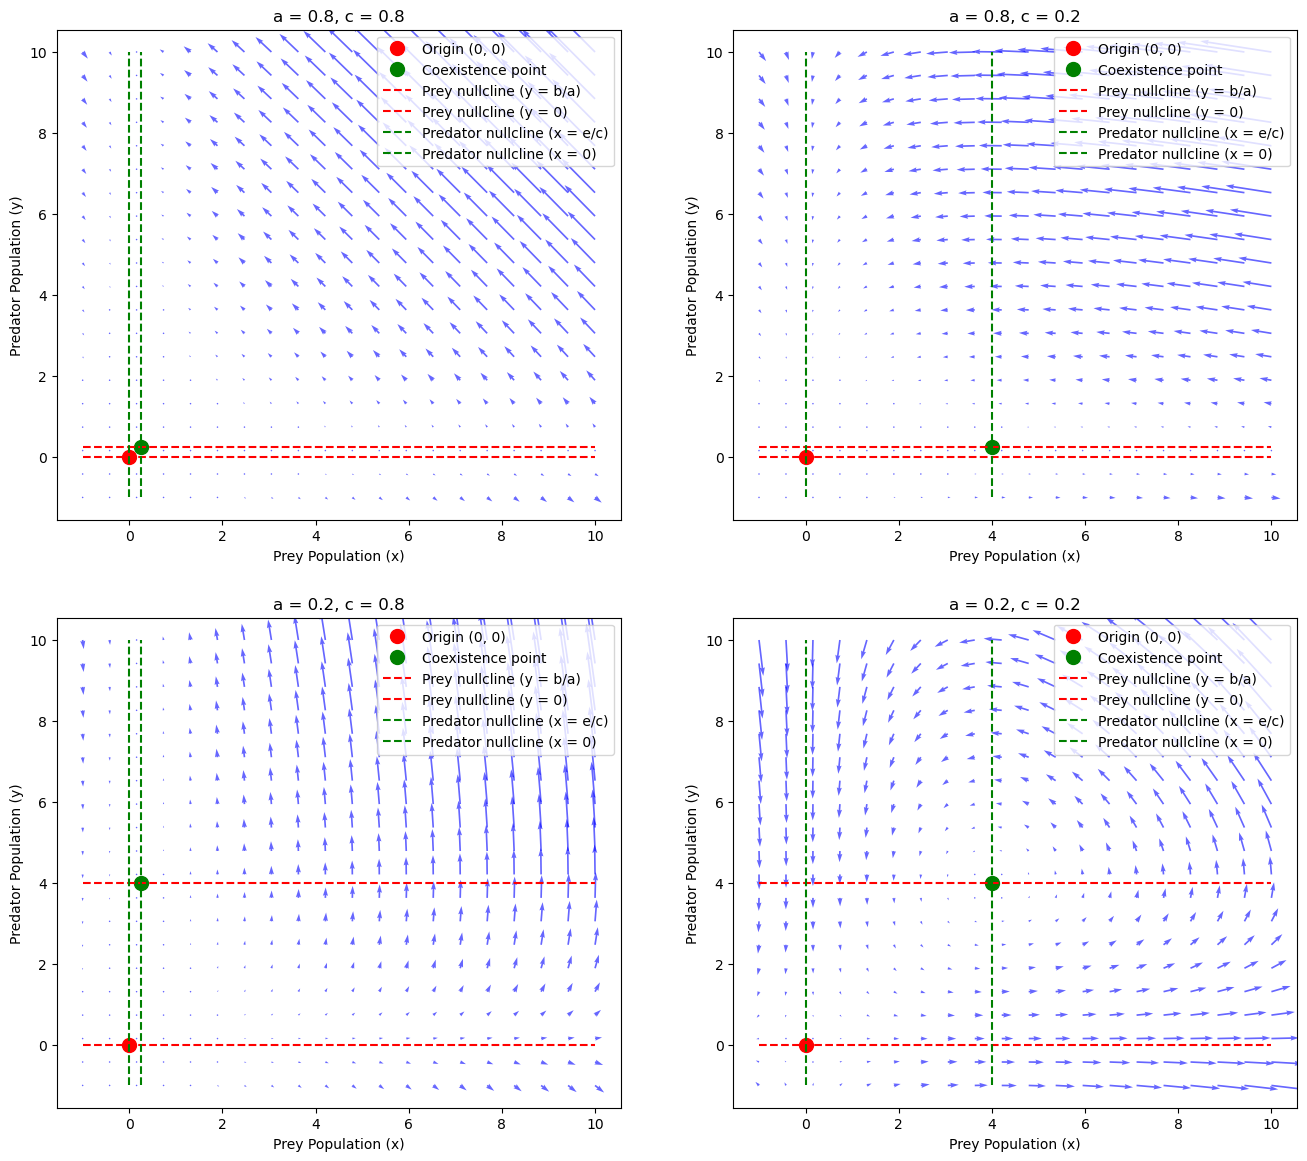

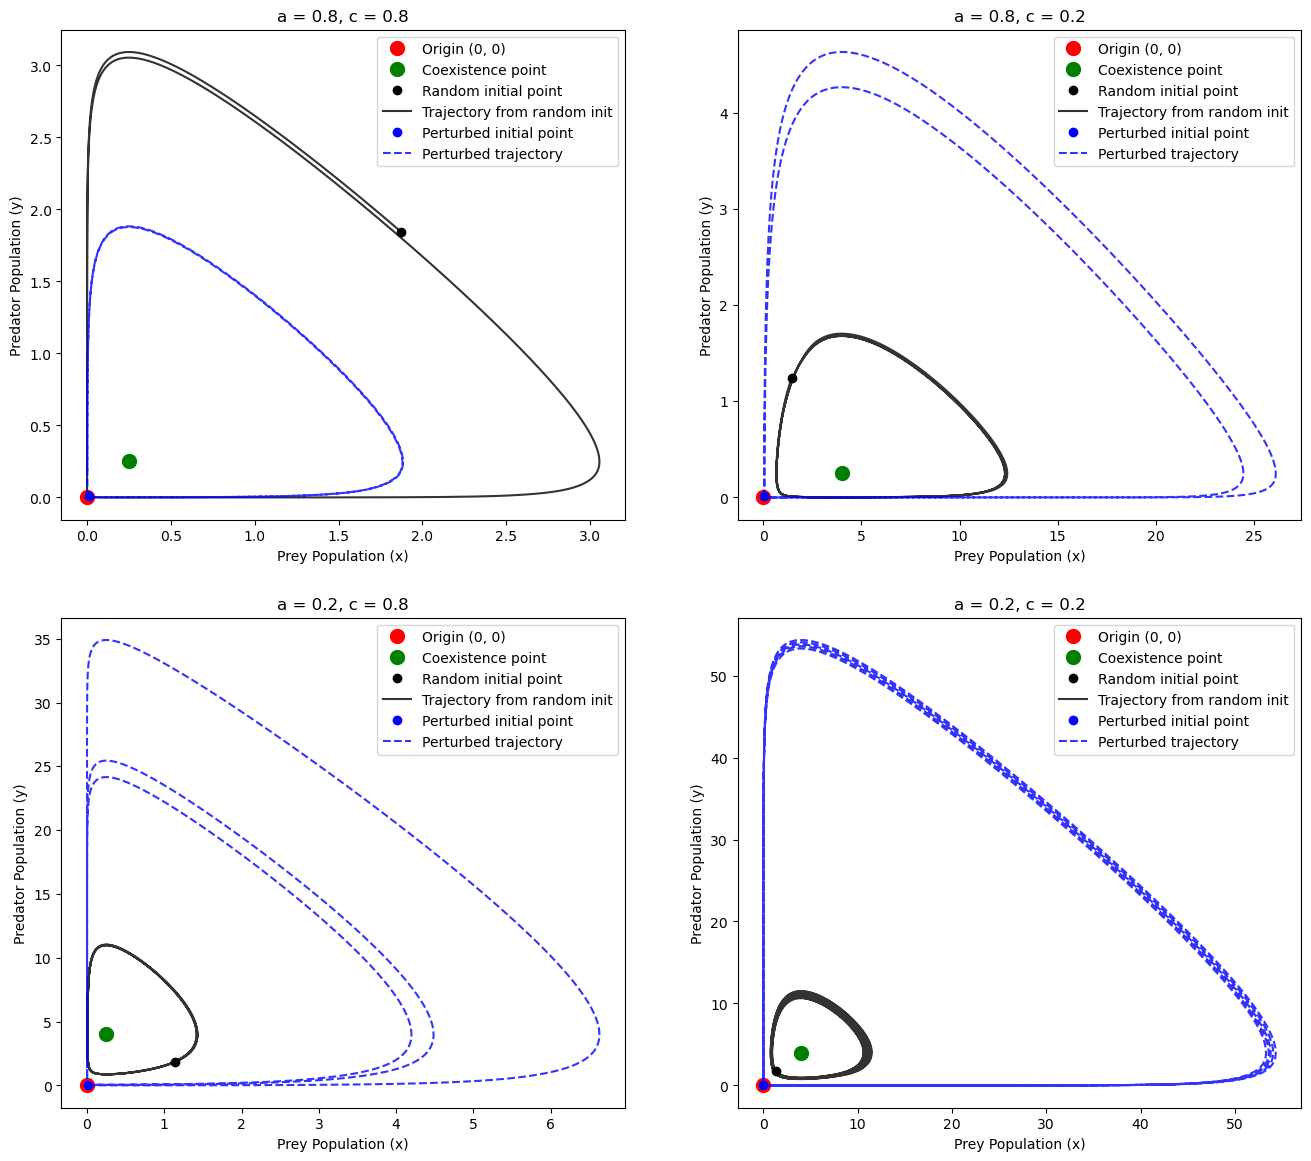

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def lotka_volterra(t, state, a, b, c, e):
    x, y = state
    dxdt = x * (b - a * y)
    dydt = y * (-e + c * x)
    return [dxdt, dydt]

a_values = [0.8, 0.2]
c_values = [0.8, 0.2]

x = np.linspace(-1, 10, 20)
y = np.linspace(-1, 10, 20)
X, Y = np.meshgrid(x, y)
t_span = [0, 100]
t_eval = np.linspace(t_span[0], t_span[1], 10000)

fig, axes = plt.subplots(2, 2, figsize=(16, 14))
fig_traj, traj_axes = plt.subplots(2, 2, figsize=(16, 14))

for i, a in enumerate(a_values):
    for j, c in enumerate(c_values):
        b = 1 - a
        e = 1 - c
        
        U = X * (b - a * Y)
        V = Y * (-e + c * X)

        ax = axes[i, j]
        ax.quiver(X, Y, U, V, color='blue', alpha=0.6)

        fixed_points = [(0, 0), (e / c, b / a)]
        for point in fixed_points:
            ax.plot(point[0], point[1], 'ro', markersize=10, label='Origin (0, 0)' if point == (0, 0) else None) if point == (0, 0) else ax.plot(point[0], point[1], 'go', markersize=10, label='Coexistence point')

        ax.plot(x, [b / a] * len(x), 'r--', label='Prey nullcline (y = b/a)')
        ax.plot(x, [0] * len(x), 'r--', label='Prey nullcline (y = 0)')
        ax.plot([e / c] * len(y), y, 'g--', label='Predator nullcline (x = e/c)')
        ax.plot([0] * len(y), y, 'g--', label='Predator nullcline (x = 0)')
        
        ax.set_title(f'a = {a}, c = {c}')
        ax.set_xlabel('Prey Population (x)')
        ax.set_ylabel('Predator Population (y)')
        ax.legend()

        traj_ax = traj_axes[i, j]
        for point in fixed_points:
            traj_ax.plot(point[0], point[1], 'ro', markersize=10, label='Origin (0, 0)' if point == (0, 0) else None) if point == (0, 0) else traj_ax.plot(point[0], point[1], 'go', markersize=10, label='Coexistence point')
        initial_state = [np.random.uniform(1, 2), np.random.uniform(1, 2)]
        traj_ax.plot(initial_state[0], initial_state[1], 'ko', markersize=6, label='Random initial point')
        
        trajectory = [initial_state]
        dt = 0.01
        current_state = initial_state
        trajectory = solve_ivp(lotka_volterra, t_span, initial_state, args=(a, b, c, e), t_eval=t_eval)['y']
        traj_ax.plot(trajectory[0], trajectory[1], 'k-', label='Trajectory from random init', alpha=0.8)

        perturbed_state = [0.01, 0.01]
        traj_ax.plot(perturbed_state[0], perturbed_state[1], 'bo', markersize=6, label='Perturbed initial point')
        perturbed_trajectory = [perturbed_state]
        current_state = perturbed_state
        perturbed_trajectory = solve_ivp(lotka_volterra, t_span, perturbed_state, args=(a, b, c, e), t_eval=t_eval)['y']
        traj_ax.plot(perturbed_trajectory[0], perturbed_trajectory[1], 'b--', label='Perturbed trajectory', alpha=0.8)

        traj_ax.set_title(f'a = {a}, c = {c}')
        traj_ax.set_xlabel('Prey Population (x)')
        traj_ax.set_ylabel('Predator Population (y)')
        traj_ax.legend()

plt.show()


From the plots, the origin \((0, 0)\) is an unstable equilibrium. If both populations are exactly zero, they remain so. However, with a small perturbation, the system moves away from the origin, indicating that even a small introduction of prey or predators leads to dynamic changes in population sizes. This shows that the origin is not a stable state, and any slight presence of either species will initiate growth or decline based on the interaction rates.

Theoretically, the system would oscillate around another fixed point, the coexistence point, in a periodic manner. However, due to numerical simulation errors, the plots show some deviations from the ideal behavior.

If \(x = 0\) and \(y > 0\), predators will eventually die out due to lack of food.

If \(y = 0\) and \(x > 0\), prey will grow exponentially without predators to keep them in check.

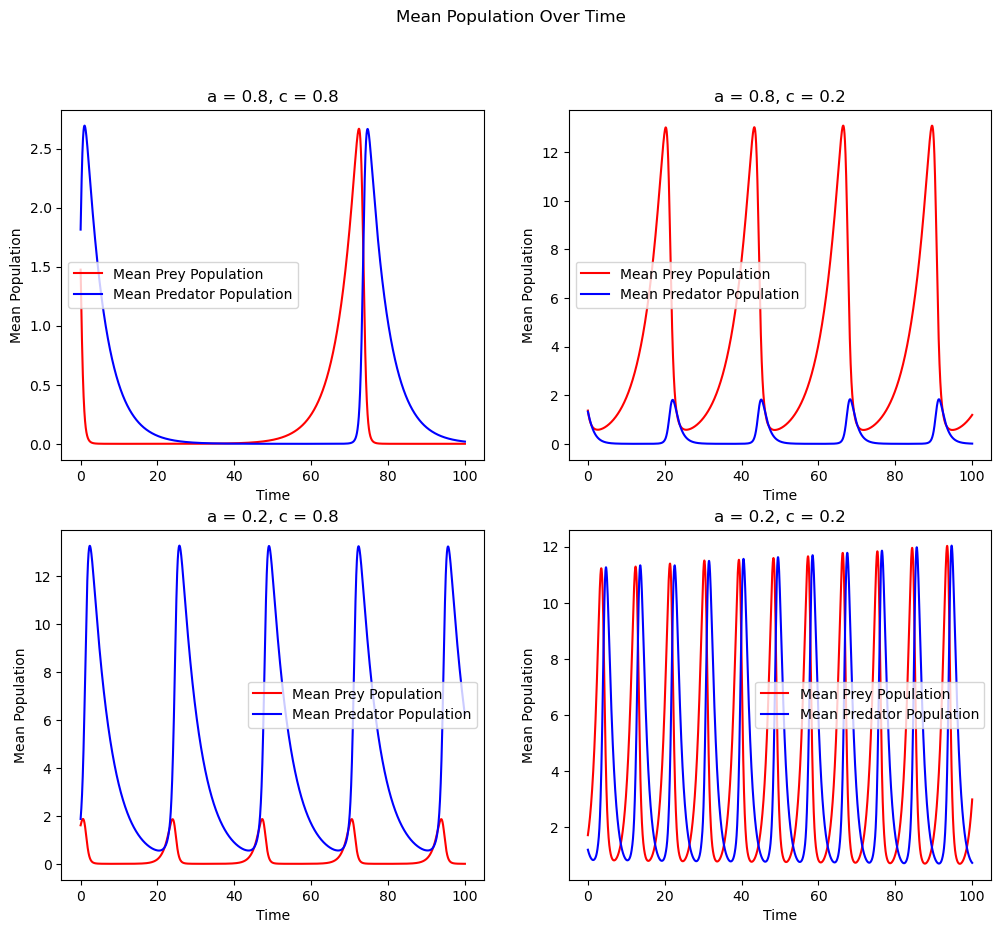

In [2]:
fig_mean, mean_axes = plt.subplots(2, 2, figsize=(12, 10))

for i, a in enumerate(a_values):
    for j, c in enumerate(c_values):
        b = 1 - a
        e = 1 - c
        
        initial_state = [np.random.uniform(1, 2), np.random.uniform(1, 2)]
        trajectory = solve_ivp(lotka_volterra, t_span, initial_state, args=(a, b, c, e), t_eval=t_eval)['y']
        prey_population = trajectory[0]
        predator_population = trajectory[1]
        
        ax_mean = mean_axes[i, j]
        ax_mean.plot(t_eval, prey_population, 'r-', label='Mean Prey Population')
        ax_mean.plot(t_eval, predator_population, 'b-', label='Mean Predator Population')
        ax_mean.set_title(f'a = {a}, c = {c}')
        ax_mean.set_xlabel('Time')
        ax_mean.set_ylabel('Mean Population')
        ax_mean.legend()

fig_mean.suptitle('Mean Population Over Time')
plt.show()

Each plot shows a periodic behavior, indicating that the mean value of the system over one period remains unchanged over time, although there might be some small calculation errors. These errors can arise due to the choice of integration step size during numerical simulations. Such errors can accumulate in some periods or for specific parameter values, leading to slight misalignment or small fluctuations in the system's mean values. However, these errors are generally acceptable as long as the overall dynamic behavior of the system meets the expected pattern.